<a href="https://colab.research.google.com/github/Smartpero/Web_Scraper/blob/main/NLP_Finacial_Machine_Learning_Article_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relevant Libraries

In [1]:
!pip -q install PyMuPDF
!pip -q install nltk
!pip -q install scipy
!pip -q install gensim
!pip -q install sentencepiece

# Data Scraping

Data Scraping of a new article data [Financial Machine Learning](https://bfi.uchicago.edu/wp-content/uploads/2023/07/BFI_WP_2023-100.pdf)

In [2]:
import requests
from bs4 import BeautifulSoup
import re  # for extraction
import fitz

# url
pdf_url = "https://bfi.uchicago.edu/wp-content/uploads/2023/07/BFI_WP_2023-100.pdf" # data on Financial machine learning

response = requests.get(pdf_url)

if response.status_code == 200:
    pdf_document = fitz.open(stream=response.content, filetype="pdf")

    article_text = ""
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        article_text += page.get_text()

    article_words = re.sub(r"\s+", " ", article_text).strip()



In [3]:
article_words[:500] # wextract article intro

'5757 S. University Ave. Chicago, IL 60637 Main: 773.702.5599 bfi.uchicago.edu WORKING PAPER · NO. 2023-100 Financial Machine Learning Bryan T. Kelly and Dacheng Xiu JULY 2023 FINANCIAL MACHINE LEARNING Bryan T. Kelly Dacheng Xiu July 2023 AQR Capital Management is a global investment management firm, which may or may not apply similar investment techniques or methods of analysis as described herein. The views expressed here are those of the authors and not necessarily those of AQR. © 2023 by Bry'

In [4]:
article_words[15000:15500] # extract excerpt of main content

'e that the deﬁnition of machine learning is inchoate and the term is at times corrupted by the mar- keting purposes of the user. We follow Gu et al. (2020b) and use the term to describe (i) a diverse collection of high-dimensional models for 1Readers of this survey are encouraged to re-visit chapter 8 of Cochrane (2009) and recognize the many ways machine learning concepts mesh with his outline of the role of conditioning information in asset prices. 1.4. Machine Learning versus Econometrics 7 s'

Removing New Line Characters

In [5]:
article_lines = [re.sub(r"\s+", " ", line).strip() for line in article_text.split("\n") if line.strip()]
article_lines[:500]

['5757 S. University Ave.',
 'Chicago, IL 60637',
 'Main: 773.702.5599',
 'bfi.uchicago.edu',
 'WORKING PAPER · NO. 2023-100',
 'Financial Machine Learning',
 'Bryan T. Kelly and Dacheng Xiu',
 'JULY 2023',
 'FINANCIAL MACHINE LEARNING',
 'Bryan T. Kelly',
 'Dacheng Xiu',
 'July 2023',
 'AQR Capital Management is a global investment management firm, which may or may not apply',
 'similar investment techniques or methods of analysis as described herein. The views expressed',
 'here are those of the authors and not necessarily those of AQR.',
 '© 2023 by Bryan T. Kelly and Dacheng Xiu. All rights reserved. Short sections of text, not to',
 'exceed two paragraphs, may be quoted without explicit permission provided that full credit,',
 'including © notice, is given to the source.',
 'Financial Machine Learning',
 'Bryan T. Kelly and Dacheng Xiu',
 'July 2023',
 'JEL No. C33,C4,C45,C55,C58,G1,G10,G11,G12,G17',
 'ABSTRACT',
 'We survey the nascent literature on machine learning in the study 

In [6]:
# renove noisy lines from the data
article_lines = [re.sub(r"\d+", " ", line.lower()) for line in article_lines if len(line.strip()) > 5]
article_lines[100:200]

['tobias moskowitz, lasse pedersen, markus pelger, seth pruitt, and',
 'guofu zhou for helpful comments. aqr capital management is a global',
 'investment management ﬁrm, which may or may not apply similar in-',
 'vestment techniques or methods of analysis as described herein. the',
 'views expressed here are those of the authors and not necessarily those',
 'of aqr.',
 'introduction: the case for financial machine',
 'learning',
 'prices are predictions',
 'modern analysis of ﬁnancial markets centers on the following deﬁnition',
 'of a price, derived from the generic optimality condition of an investor:',
 'pi,t = e[mt+ xi,t+ |it].',
 'in words, the prevailing price of an asset, pi,t, reﬂect investors’ valuation',
 'of its future payoﬀs, xi,t+ . these valuations are discounted based on in-',
 'vestors’ preferences, generically summarized as future realized marginal',
 'rates of substitution, mt+ . the price is then determined by investor',
 'expectations of these objects given their c

## Chacter Tokensization

In [7]:
ct_article_lines = [list(sentence) for sentence in article_lines]
ct_article_lines[100:200]

[['t',
  'o',
  'b',
  'i',
  'a',
  's',
  ' ',
  'm',
  'o',
  's',
  'k',
  'o',
  'w',
  'i',
  't',
  'z',
  ',',
  ' ',
  'l',
  'a',
  's',
  's',
  'e',
  ' ',
  'p',
  'e',
  'd',
  'e',
  'r',
  's',
  'e',
  'n',
  ',',
  ' ',
  'm',
  'a',
  'r',
  'k',
  'u',
  's',
  ' ',
  'p',
  'e',
  'l',
  'g',
  'e',
  'r',
  ',',
  ' ',
  's',
  'e',
  't',
  'h',
  ' ',
  'p',
  'r',
  'u',
  'i',
  't',
  't',
  ',',
  ' ',
  'a',
  'n',
  'd'],
 ['g',
  'u',
  'o',
  'f',
  'u',
  ' ',
  'z',
  'h',
  'o',
  'u',
  ' ',
  'f',
  'o',
  'r',
  ' ',
  'h',
  'e',
  'l',
  'p',
  'f',
  'u',
  'l',
  ' ',
  'c',
  'o',
  'm',
  'm',
  'e',
  'n',
  't',
  's',
  '.',
  ' ',
  'a',
  'q',
  'r',
  ' ',
  'c',
  'a',
  'p',
  'i',
  't',
  'a',
  'l',
  ' ',
  'm',
  'a',
  'n',
  'a',
  'g',
  'e',
  'm',
  'e',
  'n',
  't',
  ' ',
  'i',
  's',
  ' ',
  'a',
  ' ',
  'g',
  'l',
  'o',
  'b',
  'a',
  'l'],
 ['i',
  'n',
  'v',
  'e',
  's',
  't',
  'm',
  'e',
  'n',
  't',
  ' 

# Word Tokenisation

In [8]:
wt_article_lines = [sentence.split() for sentence in article_lines]
wt_article_lines[100:200]

[['tobias',
  'moskowitz,',
  'lasse',
  'pedersen,',
  'markus',
  'pelger,',
  'seth',
  'pruitt,',
  'and'],
 ['guofu',
  'zhou',
  'for',
  'helpful',
  'comments.',
  'aqr',
  'capital',
  'management',
  'is',
  'a',
  'global'],
 ['investment',
  'management',
  'ﬁrm,',
  'which',
  'may',
  'or',
  'may',
  'not',
  'apply',
  'similar',
  'in-'],
 ['vestment',
  'techniques',
  'or',
  'methods',
  'of',
  'analysis',
  'as',
  'described',
  'herein.',
  'the'],
 ['views',
  'expressed',
  'here',
  'are',
  'those',
  'of',
  'the',
  'authors',
  'and',
  'not',
  'necessarily',
  'those'],
 ['of', 'aqr.'],
 ['introduction:', 'the', 'case', 'for', 'financial', 'machine'],
 ['learning'],
 ['prices', 'are', 'predictions'],
 ['modern',
  'analysis',
  'of',
  'ﬁnancial',
  'markets',
  'centers',
  'on',
  'the',
  'following',
  'deﬁnition'],
 ['of',
  'a',
  'price,',
  'derived',
  'from',
  'the',
  'generic',
  'optimality',
  'condition',
  'of',
  'an',
  'investor:'],


In [9]:
import nltk
from nltk.tokenize import word_tokenize, MWETokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # download missing resource
from nltk.corpus import stopwords # stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
stopwords.words('english') # print english stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [11]:
# find postion of stopwords in the data

stopwords = set(stopwords.words('english'))

article_stopwords = re.findall(r'\w+',article_text.lower())

for idx, word in enumerate(article_stopwords):
    if word in stopwords:
        print(f"Stopword: '{word}' found at position {idx}")

Streaming output truncated to the last 5000 lines.
Stopword: 'so' found at position 37953
Stopword: 'a' found at position 37954
Stopword: 'of' found at position 37957
Stopword: 'the' found at position 37958
Stopword: 'the' found at position 37966
Stopword: 'can' found at position 37968
Stopword: 'do' found at position 37969
Stopword: 'by' found at position 37971
Stopword: 'the' found at position 37973
Stopword: 'of' found at position 37975
Stopword: 'and' found at position 37978
Stopword: 'for' found at position 37980
Stopword: 'it' found at position 37981
Stopword: 'in' found at position 37982
Stopword: 'their' found at position 37983
Stopword: 'this' found at position 37987
Stopword: 'for' found at position 37989
Stopword: 'of' found at position 37992
Stopword: 'and' found at position 37994
Stopword: 'once' found at position 37998
Stopword: 'again' found at position 37999
Stopword: 'to' found at position 38000
Stopword: 'that' found at position 38003
Stopword: 'are' found at position

In [12]:
# tokenize using nltk

wt_article_lines = [word_tokenize(sentence) for sentence in article_lines]
wt_article_lines[100:200]
#

[['tobias',
  'moskowitz',
  ',',
  'lasse',
  'pedersen',
  ',',
  'markus',
  'pelger',
  ',',
  'seth',
  'pruitt',
  ',',
  'and'],
 ['guofu',
  'zhou',
  'for',
  'helpful',
  'comments',
  '.',
  'aqr',
  'capital',
  'management',
  'is',
  'a',
  'global'],
 ['investment',
  'management',
  'ﬁrm',
  ',',
  'which',
  'may',
  'or',
  'may',
  'not',
  'apply',
  'similar',
  'in-'],
 ['vestment',
  'techniques',
  'or',
  'methods',
  'of',
  'analysis',
  'as',
  'described',
  'herein',
  '.',
  'the'],
 ['views',
  'expressed',
  'here',
  'are',
  'those',
  'of',
  'the',
  'authors',
  'and',
  'not',
  'necessarily',
  'those'],
 ['of', 'aqr', '.'],
 ['introduction', ':', 'the', 'case', 'for', 'financial', 'machine'],
 ['learning'],
 ['prices', 'are', 'predictions'],
 ['modern',
  'analysis',
  'of',
  'ﬁnancial',
  'markets',
  'centers',
  'on',
  'the',
  'following',
  'deﬁnition'],
 ['of',
  'a',
  'price',
  ',',
  'derived',
  'from',
  'the',
  'generic',
  'opti

In [13]:
# aggregate mutilple words "financial economics" & "machine learning" into one token

article_mwe = MWETokenizer([('financial', 'economics'), ('machine', 'learning')])

article_words_flat = [word for sentence in wt_article_lines for word in sentence] # Flatten the list of lists into a single list of words
article_mwe_tokens = article_mwe.tokenize(article_words_flat)
print(article_mwe_tokens)


['s.', 'university', 'ave', '.', 'chicago', ',', 'il', 'main', ':', '.', '.', 'bfi.uchicago.edu', 'working', 'paper', '·', 'no', '.', '-', 'financial', 'machine_learning', 'bryan', 't.', 'kelly', 'and', 'dacheng', 'xiu', 'july', 'financial', 'machine_learning', 'bryan', 't.', 'kelly', 'dacheng', 'xiu', 'july', 'aqr', 'capital', 'management', 'is', 'a', 'global', 'investment', 'management', 'firm', ',', 'which', 'may', 'or', 'may', 'not', 'apply', 'similar', 'investment', 'techniques', 'or', 'methods', 'of', 'analysis', 'as', 'described', 'herein', '.', 'the', 'views', 'expressed', 'here', 'are', 'those', 'of', 'the', 'authors', 'and', 'not', 'necessarily', 'those', 'of', 'aqr', '.', '©', 'by', 'bryan', 't.', 'kelly', 'and', 'dacheng', 'xiu', '.', 'all', 'rights', 'reserved', '.', 'short', 'sections', 'of', 'text', ',', 'not', 'to', 'exceed', 'two', 'paragraphs', ',', 'may', 'be', 'quoted', 'without', 'explicit', 'permission', 'provided', 'that', 'full', 'credit', ',', 'including', '©',

Character Tokenization

In [14]:
ct_article_lines = [list(sentence) for sentence in article_lines]
ct_article_lines[100]

['t',
 'o',
 'b',
 'i',
 'a',
 's',
 ' ',
 'm',
 'o',
 's',
 'k',
 'o',
 'w',
 'i',
 't',
 'z',
 ',',
 ' ',
 'l',
 'a',
 's',
 's',
 'e',
 ' ',
 'p',
 'e',
 'd',
 'e',
 'r',
 's',
 'e',
 'n',
 ',',
 ' ',
 'm',
 'a',
 'r',
 'k',
 'u',
 's',
 ' ',
 'p',
 'e',
 'l',
 'g',
 'e',
 'r',
 ',',
 ' ',
 's',
 'e',
 't',
 'h',
 ' ',
 'p',
 'r',
 'u',
 'i',
 't',
 't',
 ',',
 ' ',
 'a',
 'n',
 'd']

# Subword Tokenization

In [15]:
import sentencepiece as spm

with open('data.txt', 'w') as file:
    file.write('\n'.join(article_lines))

In [16]:
# Encode and Decode Sample text
spm.SentencePieceTrainer.train('--input=data.txt --model_prefix=m --vocab_size=3000 --model_type=unigram' )
sp = spm.SentencePieceProcessor(model_file='m.model')

sample_text = "Machine learning is now been applied in financial markets"


# Encode sample text
pieces  = sp.encode_as_pieces(sample_text)
ids = sp.encode_as_ids(sample_text)

full_text = sp.decode_pieces(pieces)


print(f" Tokenized Subwords {ids}: {pieces}")
print(f"Decoded Subwords: {full_text}")


 Tokenized Subwords [13, 0, 1901, 1842, 35, 16, 266, 248, 58, 247, 589, 14, 73, 443]: ['▁', 'M', 'ach', 'ine', '▁learning', '▁is', '▁no', 'w', '▁be', 'en', '▁applied', '▁in', '▁financial', '▁markets']
Decoded Subwords: Machine learning is now been applied in financial markets


In [17]:
# Known word
word = "financial"
tokens = sp.EncodeAsPieces(word)
print(f"{word}: {tokens}")

# Unknown word
word = "commercial"
tokens = sp.EncodeAsPieces(word)
print(f"{word}: {tokens}")

financial: ['▁financial']
commercial: ['▁com', 'm', 'er', 'cial']


# Visualizing Text Data

## Character-Level Plots

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8413 (\N{COMBINING ENCLOSING CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


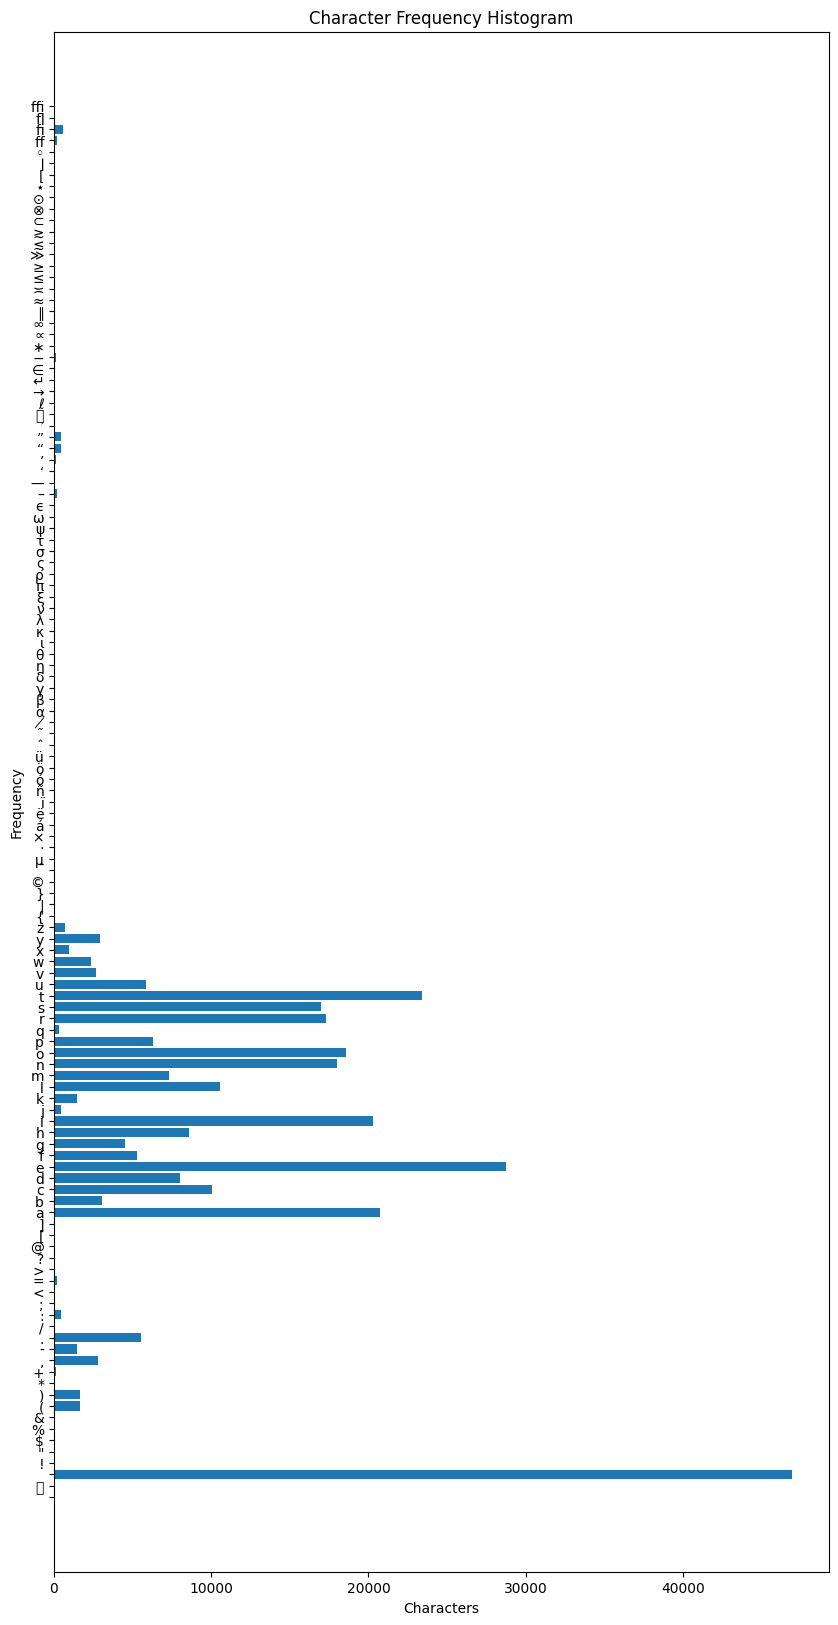

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm.auto as tqdm

sep_characters = list(''.join(article_lines))
unique_characters= np.unique(sep_characters, return_counts=True)

# Plot Histogram
plt.figure(figsize=(10, 20))
plt.barh(unique_characters[0], unique_characters[1],)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Frequency Histogram')
plt.show()

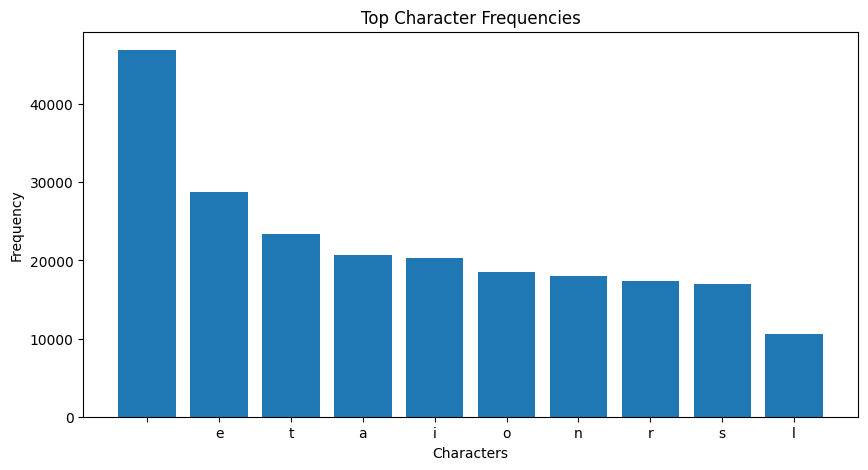

In [19]:
# Bar Plot of Top Characters

char_freq = nltk.FreqDist(sep_characters)
top_chars = char_freq.most_common(10)  # top 10 characters
chars_x, chars_y = zip(*top_chars)

plt.figure(figsize=(10, 5))
plt.bar(chars_x, chars_y)
plt.title("Top Character Frequencies")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()

## Word-Level Plots

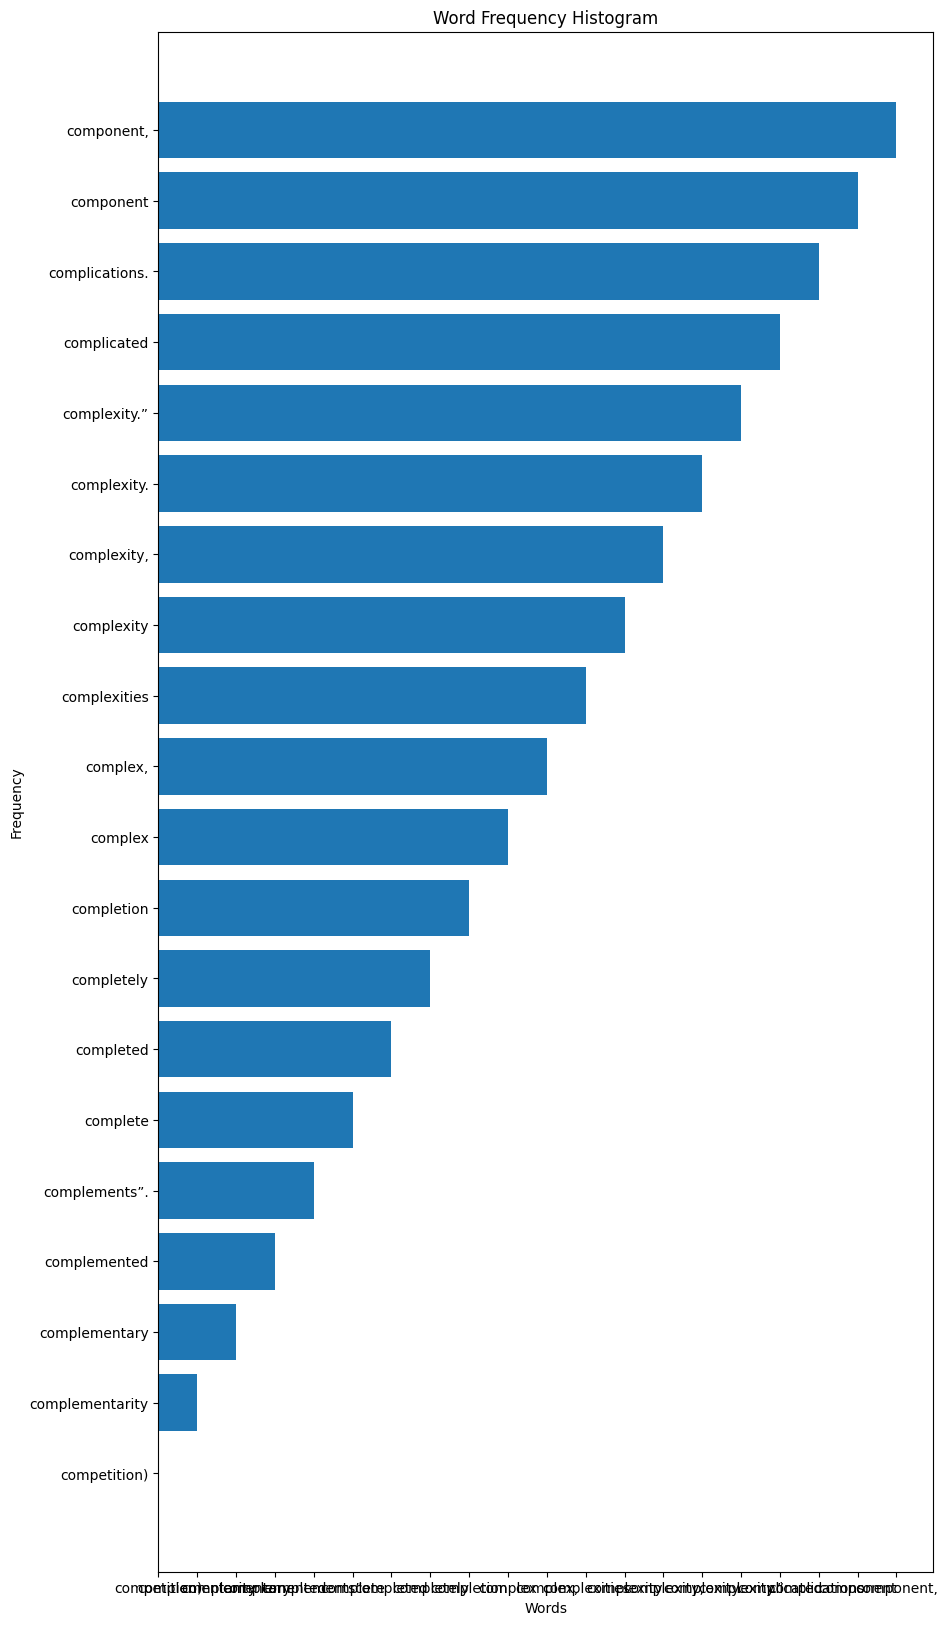

In [20]:
sep_words = ' '.join(article_lines)
unique_words = np.unique(sep_words.split(), return_counts=True)

unique_words[0][unique_words[1].argmax()]

plt.figure(figsize=(10, 20))
plt.barh(unique_words[0][1500:1520], unique_words[0][1500:1520],)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Histogram')
plt.show()

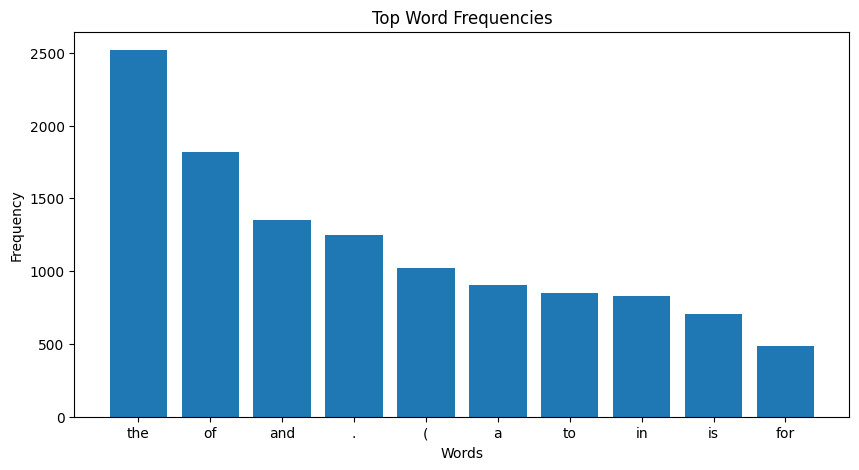

In [21]:
# Bar Plot of Top 10 Words frequencies
import nltk

word_freq = nltk.FreqDist(sep_words.split())
top_words = word_freq.most_common(10)  # top 10 words
words_x, words_y = zip(*top_words)

plt.figure(figsize=(10, 5))
plt.bar(words_x, words_y)
plt.title("Top Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

Display top word frequencies excluding stopwords.

In [22]:
#Top 10 words excluding stopwords
from collections import Counter

# Tokenize the text into words
words = sep_words.split()


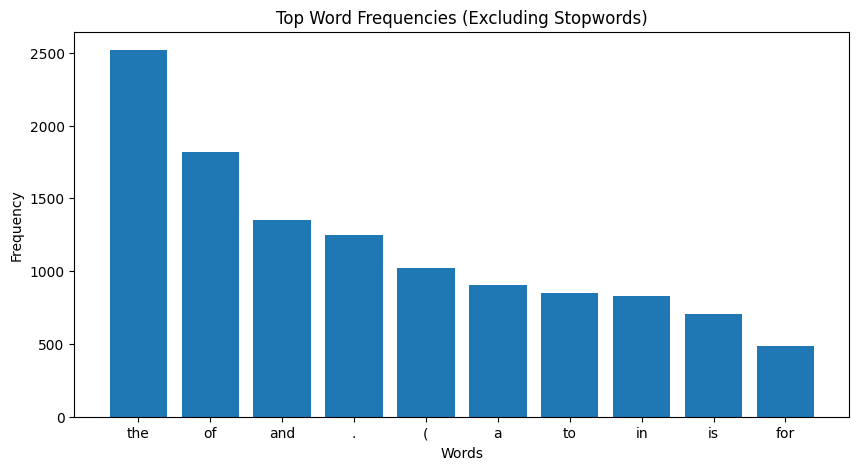

In [23]:
# Remove stopwords
filtered_words = [w for w in words if w not in stopwords]

# ==== Step 3. Count frequencies ====
word_freq_filtered = Counter(filtered_words)

# Top 10 common words
top_words_filtered = word_freq_filtered.most_common(10)

words_filtered_x, words_filtered_y = zip(*top_words)

plt.figure(figsize=(10, 5))
plt.bar(words_filtered_x, words_filtered_y)
plt.title("Top Word Frequencies (Excluding Stopwords)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# Word Cloud

In [24]:
!pip -q install wordcloud

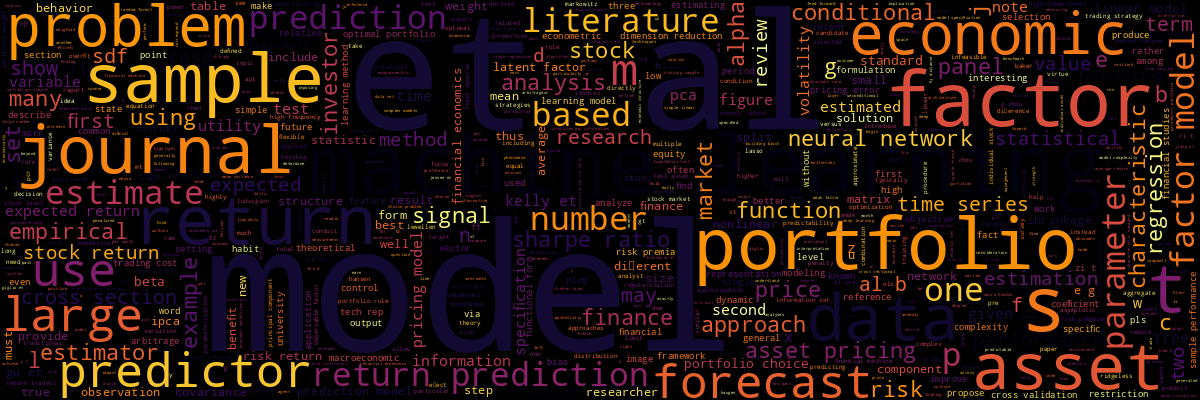

In [25]:
from wordcloud import WordCloud

wc = WordCloud(width=1200, height=400, max_words=6000, colormap="inferno", random_state=42).generate(sep_words)
wc.to_image()

# TF-IDF Implementation

**Using TF-IDF Defeinition**

In [26]:
def compute_tf(document, word): # define function that calculates term frequecy
    return document.count(word) / len(document)

def compute_idf(word, article_lines): # define function that calculates invere-document frequecy
    num_docs_with_word = sum(1 for sentence in article_lines if word in sentence)
    return np.log(len(article_lines) / (1 + num_docs_with_word))

def compute_tf_idf(document, word, article_lines):
    tf = compute_tf(document, word)
    idf = compute_idf(word, article_lines)
    return tf * idf

def sentence_tf_idf(wt_sentence, wt_article_lines):
    # Calculate TF-IDF for a sentence
    vector = []
    for word in wt_sentence:
        vector.append(compute_tf_idf(wt_sentence, word, wt_article_lines))
    return vector

In [27]:
# Display results
idx = 42
wt_sentence = wt_article_lines[idx]
print("Sentence:", ' '.join(wt_sentence))

vector = sentence_tf_idf(wt_sentence, wt_article_lines)
for i, score in enumerate(vector):
    print(f"{wt_sentence[i]}: {score:.4f}")

Sentence: prices are predictions . . . . . . . . . . . . . . . . . . . .
prices: 0.2081
are: 0.1235
predictions: 0.2257
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548
.: 0.5548


**Using Gemsim**

In [28]:
import gensim
from gensim import corpora
from gensim.models import TfidfModel

In [29]:
# Tokenized sentences dictionary
dict = corpora.Dictionary(wt_article_lines)

#Tokenized sentences into bag-of-words
bow_corpus = [dict.doc2bow(sentence) for sentence in wt_article_lines]

# Create a TF-IDF model
tfidf_model = TfidfModel(bow_corpus)

In [30]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [" ".join(sentence) for sentence in wt_article_lines]

vectorizer = TfidfVectorizer()

tfidf_vectors = vectorizer.fit_transform(documents)


print(tfidf_vectors.toarray())

# You can also get the feature names (the words from the vocabulary).
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

# doc_index = 0
# for col_index, score in zip(tfidf_vectors[doc_index].indices, tfidf_vectors[doc_index].data):
#     print(f"  {feature_names[col_index]}: {score:.4f}")

doc_index = 2
sentence = wt_article_lines[doc_index]
print(f"\nDocument {doc_index}:")
print(f"  Original words: {sentence}")
print(f"  TF-IDF scores:")


for col_index, score in zip(tfidf_vectors[doc_index].indices, tfidf_vectors[doc_index].data):

    word = feature_names[col_index]
    print(f"    {word}: {score:.4f}")

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['aa' 'abbreviate' 'ability' ... 'ﬂowing' 'ﬂows' 'ﬂuctuations']

Document 2:
  Original words: ['main', ':', '.', '.']
  TF-IDF scores:
    main: 1.0000


**Visualize Document vs Text Relationship**

For this implementation, we compared the terms with the documents in which they appear and visualise the resulting top 10 documents and features on a heatmap



 TF-IDF Matrix:
       al  and  are   as   et  et al  for   in   is  learning  model  models  \
0     0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0       0.0    0.0     0.0   
1     0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0       0.0    0.0     0.0   
2     0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0       0.0    0.0     0.0   
3     0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0       0.0    0.0     0.0   
4     0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0       0.0    0.0     0.0   
...   ...  ...  ...  ...  ...    ...  ...  ...  ...       ...    ...     ...   
5391  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0       0.0    0.0     0.0   
5392  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0       0.0    0.0     0.0   
5393  0.0  1.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0       0.0    0.0     0.0   
5394  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0       0.0    0.0     0.0   
5395  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0       0.0    0.0     1.0   

       of  of the   on

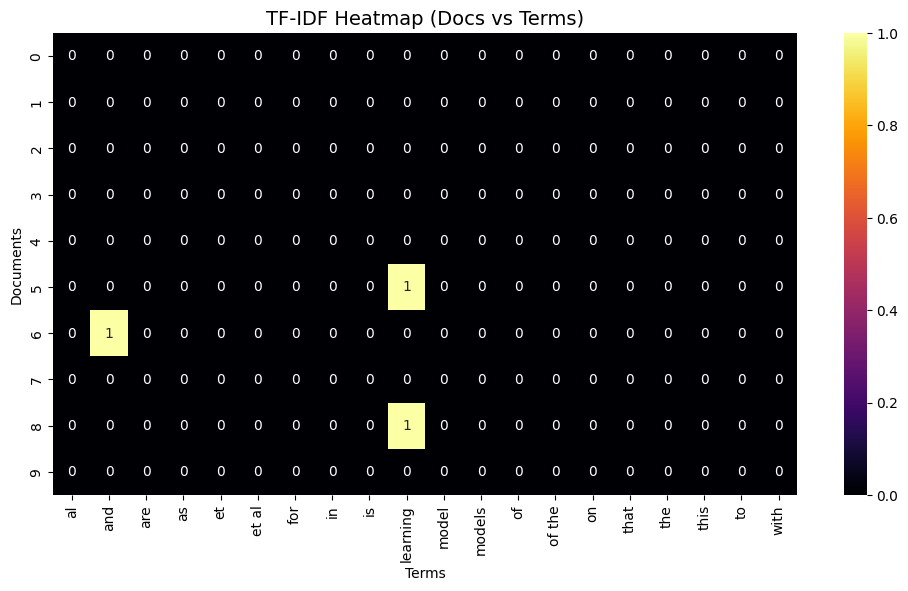

In [31]:
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(
    max_features=20,       # top 20 features
    ngram_range=(1,2),     # unigrams + bigrams
    smooth_idf=True,
    sublinear_tf=True      # use log-scaling for term freq
)

# Join the tokens in each sentence back into a string
documents = [" ".join(sentence) for sentence in wt_article_lines]

tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
print("\n TF-IDF Matrix:")
print(df_tfidf)

plt.figure(figsize=(12,6))
sns.heatmap(df_tfidf.head(10), annot=True, cmap="inferno", xticklabels=feature_names) # Displaying only the first 10 documents for better visualization
plt.title("TF-IDF Heatmap (Docs vs Terms)", fontsize=14)
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

# Word Similarity

In [32]:
!gdown 0B7XkCwpI5KDYNlNUTTlSS21pQmM

Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=f843fd8f-9c51-4df7-b460-25d26db43e9c
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:29<00:00, 55.1MB/s]


In [33]:
!gunzip GoogleNews-vectors-negative300.bin.gz

gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? y


In [34]:
from gensim.models import KeyedVectors

# Loading pre-trained word embeddings
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [35]:
def gensim_similarity(word1, word2):
    if word1 in word_vectors and word2 in word_vectors:
        return word_vectors.similarity(word1, word2)
    return 0

In [36]:
print(gensim_similarity("financial", "markets"))

0.39494374


In [37]:
print(gensim_similarity("news", "emerged"))

0.08604101


In [38]:
print(gensim_similarity("prices", "forecasting"))

0.19572936


**Visualize Word Similarity in the Tokenized Text**

<>:14: SyntaxWarning: invalid escape sequence '\ '
<>:14: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-2159190371.py:14: SyntaxWarning: invalid escape sequence '\ '
  print("\ Word Similarity Matrix:")


\ Word Similarity Matrix:
                 =  achieved  adjust  advantageous  alleviates  allocation  \
=             1.00      0.09    0.06          0.03        0.08        0.12   
achieved      0.09      1.00    0.09          0.15        0.06        0.12   
adjust        0.06      0.09    1.00          0.29        0.11        0.17   
advantageous  0.03      0.15    0.29          1.00        0.22        0.12   
alleviates    0.08      0.06    0.11          0.22        1.00        0.07   
...            ...       ...     ...           ...         ...         ...   
with          0.14      0.10    0.08          0.06        0.16        0.03   
words         0.12      0.07    0.08         -0.03       -0.08       -0.01   
work         -0.05      0.15    0.19          0.16        0.09        0.02   
xi            0.22      0.06    0.12          0.15        0.03        0.04   
zhou          0.18      0.07    0.10          0.06        0.00        0.05   

              allocations  also    an

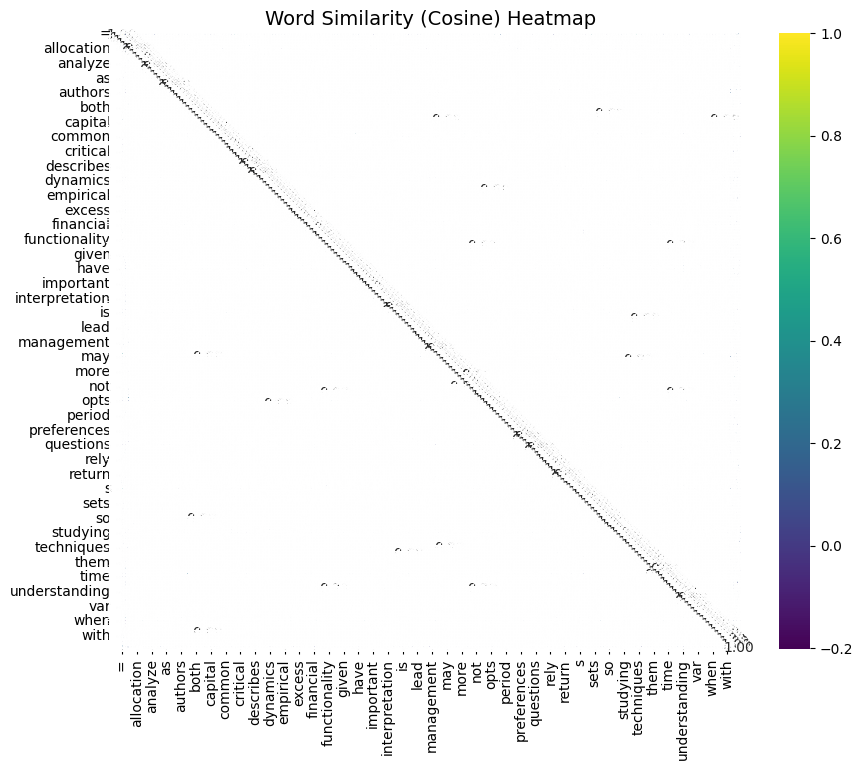

In [39]:
# Compute Pairwise Similarity Matrix

# Filter out words not in the vocabulary
filtered_wt_article_lines = [[word for word in sentence if word in word_vectors.key_to_index] for sentence in wt_article_lines[100:150]] # model only word in the 100:150 vector matrix

# Create a flattened list of unique words from the filtered sentences for indexing
unique_filtered_words = sorted(list(set([word for sentence in filtered_wt_article_lines for word in sentence])))

similarity_matrix = pd.DataFrame(
    [[word_vectors.similarity(w1, w2) for w2 in unique_filtered_words] for w1 in unique_filtered_words],
    index=unique_filtered_words, columns=unique_filtered_words
)

print("\ Word Similarity Matrix:")
print(similarity_matrix.round(2))

# ==== Step 4. Heatmap Visualization ====
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Word Similarity (Cosine) Heatmap", fontsize=14)
plt.show()

# Visualise Word Embeddings

For this implementation we reduce the vectors in to 2D arrays and visualise the similarity between words in the sentences for small sample set of text data

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


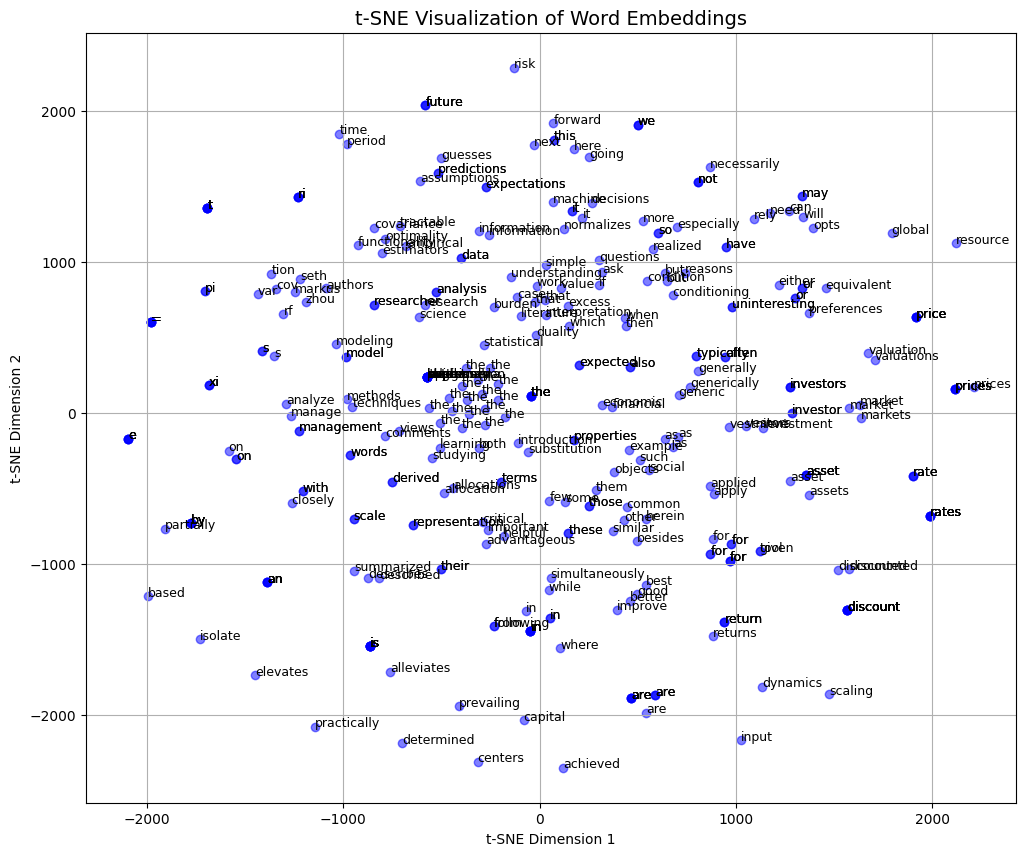

In [40]:
# Dimensionality Reduction for Visualization (word vectors into 2D using t-SNE} for 100:150 matrix in the tokenized data

from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for pretty plots


# Filter out words not in the vocabulary
filtered_sentences = [[word for word in sentence if word in word_vectors.key_to_index] for sentence in wt_article_lines[100:150]] # filtered setences in the 100:150 matrices

# Flatten the list of filtered sentences into a single list of words for t-SNE
filtered_words = [word for sentence in filtered_sentences for word in sentence]

# Get the vectors for the filtered words
word_vectors_list = [word_vectors[word] for word in filtered_words]

# Convert the list of word vectors to a NumPy array
word_vectors_array = np.array(word_vectors_list)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=5000)
word_vecs_2d = tsne.fit_transform(word_vectors_array)


# Scatter Plot of Word Embeddings
plt.figure(figsize=(12, 10))
for i, word in enumerate(filtered_words): # Iterate over filtered_words
    x, y = word_vecs_2d[i]
    plt.scatter(x, y, c="blue", alpha=0.5) # Added alpha for better visibility of overlapping points
    plt.text(x+0.05, y+0.05, word, fontsize=9) # text position

plt.title("t-SNE Visualization of Word Embeddings", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

# Training Word Embedding Model

In [41]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=wt_article_lines, vector_size=100, window=5, min_count=1, workers=4)
model.save("my_word2vec_model.bin")

In [42]:
model = Word2Vec.load('my_word2vec_model.bin')

Now we run the simaarity testwith the same words used in previously

In [43]:
model.wv.similarity('financial','markets')

0.9888913

In [44]:
model.wv.similarity('news','emerged')

0.9495427

In [45]:
model.wv.similarity('price','forecasting')

0.99895465

From the results a significant improvement from the model accuracy for all the words compared.

In [46]:
selected_words = ["financial", "markets", "prices", "forecasting", "emerged", "news", "statistical", "modeling"]
word_embeddings = np.array([word_vectors[word] for word in selected_words if word in word_vectors])
word_embeddings.shape

(8, 300)

**Visualize Embeddings**

In [47]:
from sklearn.manifold import TSNE

def visualize_embeddings_2D(selected_words, word_embeddings, word_vectors):
    # Project embeddings into 2D using t-SNE
    tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', perplexity=3)
    word_2d_embeddings = tsne.fit_transform(word_embeddings)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(selected_words):
        if word in word_vectors:
            plt.scatter(word_2d_embeddings[i, 0], word_2d_embeddings[i, 1], marker='+', color='red')
            plt.text(word_2d_embeddings[i, 0]+0.2, word_2d_embeddings[i, 1], word, fontsize=9)
    plt.show()

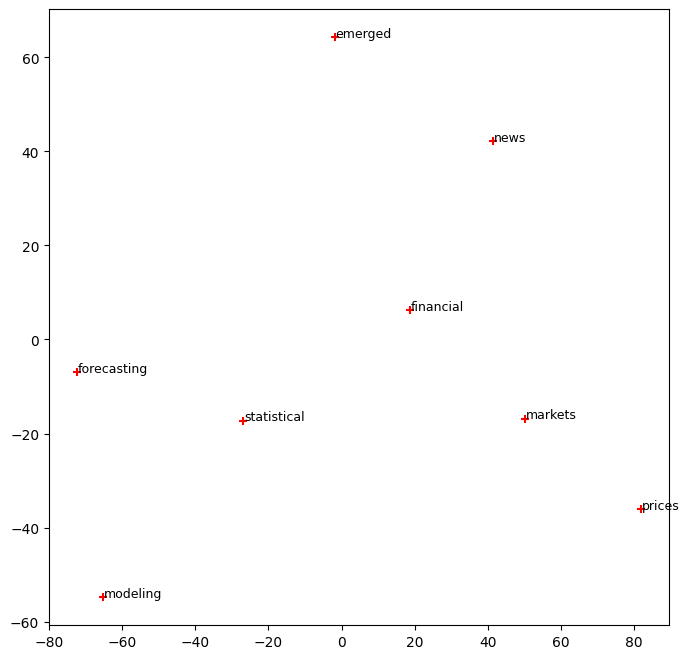

In [48]:
visualize_embeddings_2D(selected_words, word_embeddings, word_vectors)